In [657]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.express as px

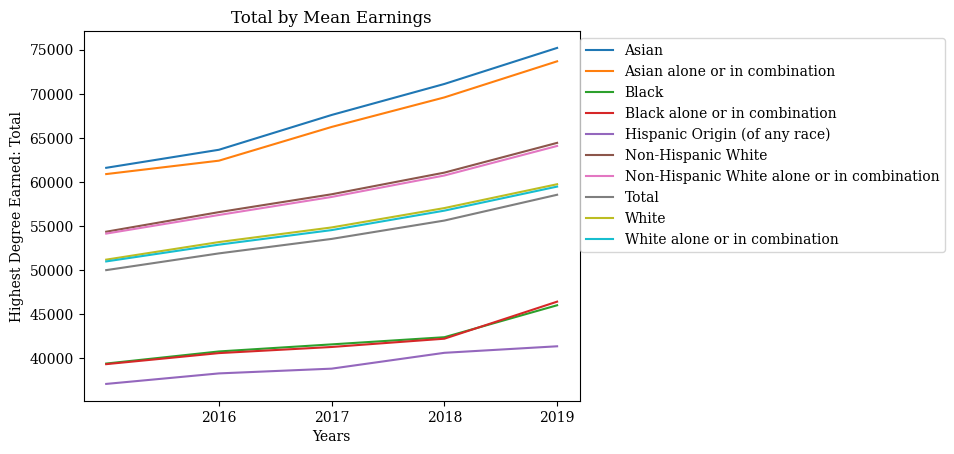

<Figure size 640x480 with 0 Axes>

In [627]:
df = pd.read_pickle('clean-pickle/taba-3.pkl')
def random_graph():    
    legend = []
    first_level = df.columns.levels[0]
    random_num = random.randint(0,5)
    rand_column = first_level[random_num]
    for groups in df.index.levels[0]:    
        for index in ['Both Sexes']:     
            try:
                plt.plot([i for i in range(2015, 2020)], df[rand_column].loc[groups, index, [str(i) for i in range(2015, 2020)]]['Mean'])
                legend.append((groups))
            except:
                plt.plot([i for i in range(2015, 2020)], df[rand_column].loc[groups, 'Both sexes', [str(i) for i in range(2015, 2020)]]['Mean'])
                legend.append((groups))

    plt.legend(legend, loc='upper right', bbox_to_anchor=(1.75, 1))
    plt.xticks([i for i in range(2016, 2020)])
    plt.xlabel('Years')
    plt.ylabel('Highest Degree Earned: ' + str(rand_column))
    plt.title(f'{rand_column} by Mean Earnings');
    plt.figure()
random_graph()


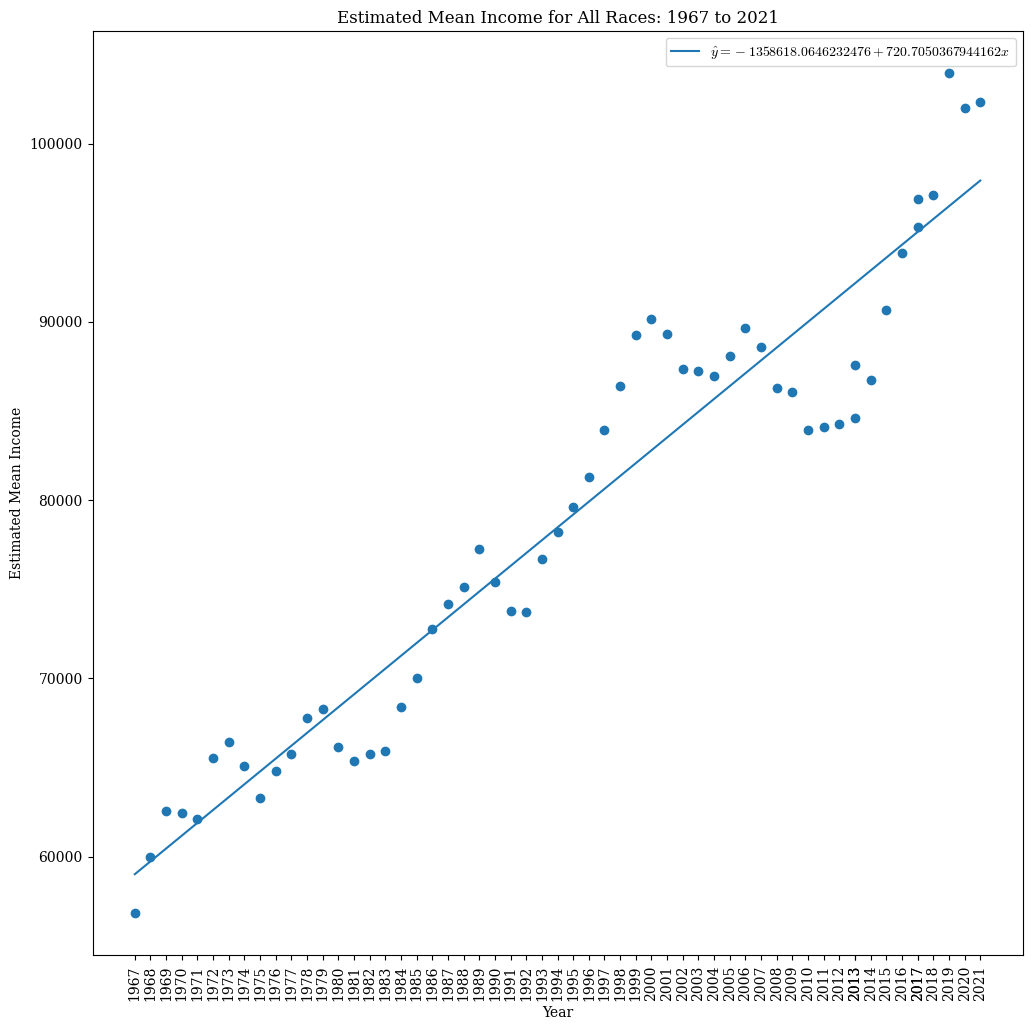

In [628]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_pickle("clean-pickle/table-A2.pkl") # Unpickle in dataframe

y = df.loc['All Races']['Mean Income']['Estimate'].sort_index() # Sort from years 1967-2021
x = list(y.index)
for i in range(0, len(x)):
    x[i] = int(x[i]) # Convert each string to an integer

x = np.array(x).reshape(-1, 1) # We have one feature so we must use reshape(-1, 1)
y = np.array(y)



lr = LinearRegression().fit(x, y) # Linear fit of the data

t = np.linspace(1967, 2021, 1000) # Variable for ploting
y_hat = lr.intercept_ + lr.coef_ * t # Our linear fit
B0 = lr.intercept_
B1 = lr.coef_[0]


fig = plt.figure(figsize=(12, 12))
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern
plt.rcParams['font.family'] = ['serif'] # I cannot stand the default font

plt.title('Estimated Mean Income for All Races: 1967 to 2021')
plt.scatter(x, y) # Scatter plot mean income
plt.plot(t, y_hat, label=r'$\hat{y}$'+f'$= {B0} + {B1}x$') # Plot regression function 
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('Estimated Mean Income')
plt.legend()
plt.xticks(rotation=90);

White Alone Not Hispanic


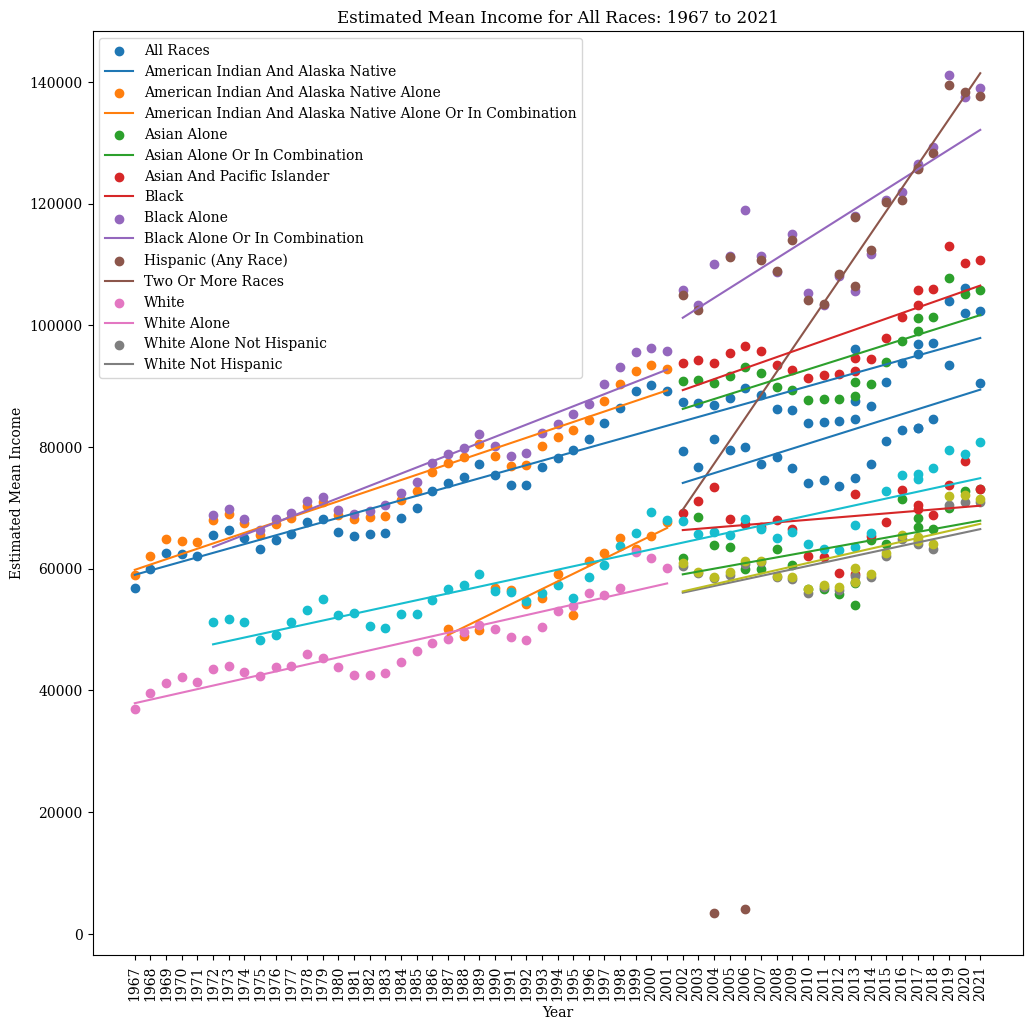

In [382]:
keys = list(df.index.levels[0])

fig = plt.figure(figsize=(12, 12))
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern
plt.rcParams['font.family'] = ['serif'] # I cannot stand the default font
plt.title('Estimated Mean Income for All Races: 1967 to 2021')
years = [i for i in range(1967, 2022)]

for i in range(0, len(keys)):
    try:
        y = df.loc[keys[i]]['Mean Income']['Estimate'].sort_index() # Sort from years 1967-2021
        x = list(y.index)
        for i in range(0, len(x)):
            x[i] = int(x[i]) # Convert each string to an integer

        x = np.array(x).reshape(-1, 1) # We have one feature so we must use reshape(-1, 1)
        y = np.array(y)



        lr = LinearRegression().fit(x, y) # Linear fit of the data

        t = np.linspace(min(x), max(x), 1000) # Variable for ploting
        y_hat = lr.intercept_ + lr.coef_ * t # Our linear fit



        plt.scatter(x, y) # Scatter plot mean income
        plt.plot(t, y_hat) # Plot regression function 
        plt.xlabel('Year')
        plt.xticks(years)
        plt.ylabel('Estimated Mean Income')
        plt.xticks(rotation=90);
    except:
        print(keys[i])
    plt.legend(keys)

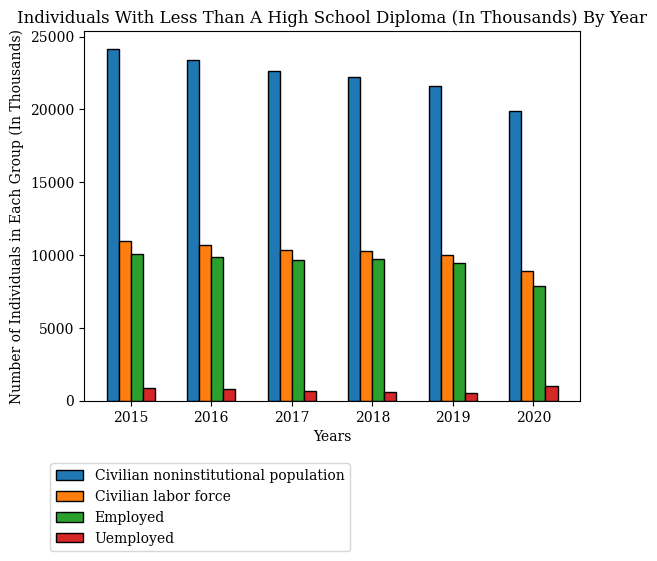

In [629]:
df = pd.read_pickle("clean-pickle/cpsaat-all-years.pkl")

group = 'Less than a high school diploma'

test = pd.DataFrame()
for i in [str(i) for i in range(2015, 2021)]:
    year = i
    cpsaat = df[year][group].loc['TOTAL'].rename(columns= {group: group + f' {year}'})
    test = pd.concat([test, cpsaat], axis=1)
test

years = [i for i in range(2015, 2021)]
columns = ['Civilian noninstitutional population', 'Civilian labor force', 'Employed', 'Uemployed']

plt.bar(x=(np.array(years) - 3 * .075 * np.ones(6)), height=test.loc['Civilian noninstitutional population'], width=.15, edgecolor='black')
plt.bar(x=(np.array(years) - .075 * np.ones(6)), height=test.loc['Civilian labor force'], width=.15, edgecolor='black')
plt.bar(x=(np.array(years) + .075 * np.ones(6)), height=test.loc['Employed'], label='Employed', width=.15, edgecolor='black')
plt.bar(x=(np.array(years) + 3 * .075 * np.ones(6)), height=test.loc['Unemployed'], label='Unemployed', width=.15, edgecolor='black')
plt.legend(columns, bbox_to_anchor=(.55, -.15))
plt.title(f"Individuals With {group.title()} (In Thousands) By Year")
plt.ylabel("Number of Individuals in Each Group (In Thousands)")
plt.xlabel("Years");

Text(0.5, 1.0, 'Unemployment Rate by Year by Educational Attainment')

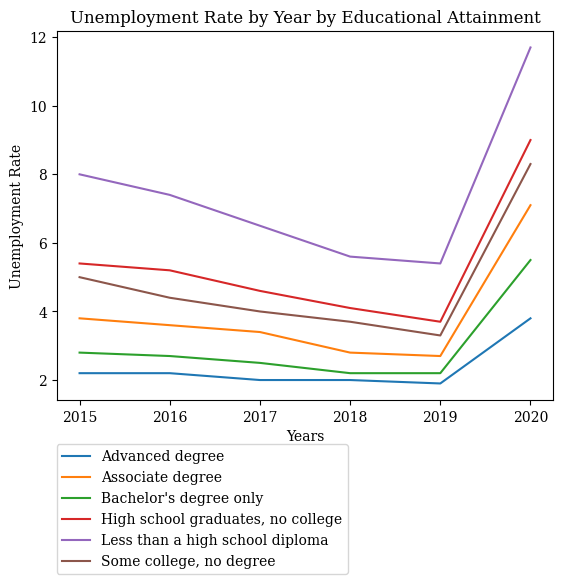

In [631]:
test = pd.DataFrame()
for i in range(2015, 2021):    
    year = str(i)
    cpsaat = df[year].droplevel(axis=1, level=[0]).loc['TOTAL'].drop('Total', axis=1)
    keys = list(cpsaat.keys())
    values = [i + f' {year}' for i in keys]
    cpsaat = cpsaat.rename(columns={key : value for (key,value) in zip(keys, values)})
    test = pd.concat([test, cpsaat], axis=1)
keys = list(df.columns.levels[2])
keys.remove('Total')

for items in keys:
    plt.plot(years, test[[items + ' ' + str(i) for i in range(2015, 2021)]].loc['Unemployment rate'])
plt.legend(keys, bbox_to_anchor=(.6,-.1))
plt.xlabel('Years')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate by Year by Educational Attainment')

Text(0.5, 1.0, 'Unemployment Rate by Year by Educational Attainment')

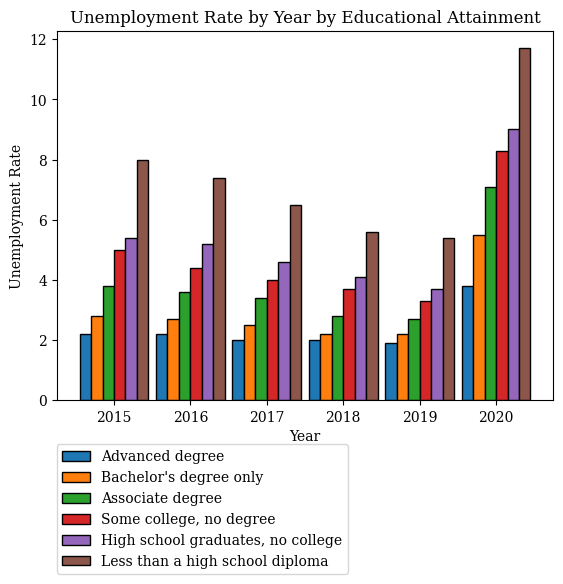

In [632]:
keys = list(df.columns.levels[2])
years = [i for i in range(2015, 2021)]
keys.remove('Total')
boxes = 6
width = .15

plt.set_cmap('Blues')

plt.bar(x=(np.array(years) - 5 * .075 * np.ones(6)), height=test[[keys[0] + ' ' + str(i) for i in range(2015, 2021)]].loc['Unemployment rate'], width=.15, label=keys[0], edgecolor='black')
plt.bar(x=(np.array(years) - 3 * .075 * np.ones(6)), height=test[[keys[2] + ' ' + str(i) for i in range(2015, 2021)]].loc['Unemployment rate'], width=.15, label=keys[2], edgecolor='black')
plt.bar(x=(np.array(years) - .075 * np.ones(6)), height=test[[keys[1] + ' ' + str(i) for i in range(2015, 2021)]].loc['Unemployment rate'], width=.15, label=keys[1], edgecolor='black')
plt.bar(x=(np.array(years) + .075 * np.ones(6)), height=test[[keys[5] + ' ' + str(i) for i in range(2015, 2021)]].loc['Unemployment rate'], width=.15, label=keys[5], edgecolor='black')
plt.bar(x=(np.array(years) + 3 * .075 * np.ones(6)), height=test[[keys[3] + ' ' + str(i) for i in range(2015, 2021)]].loc['Unemployment rate'], width=.15, label=keys[3], edgecolor='black')
plt.bar(x=(np.array(years) + 5 * .075 * np.ones(6)), height=test[[keys[4] + ' ' + str(i) for i in range(2015, 2021)]].loc['Unemployment rate'], width=.15, label=keys[4], edgecolor='black')

plt.legend(bbox_to_anchor=(.6,-.1))
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate by Year by Educational Attainment')

Text(0.5, 1.0, 'Participation rate by Year by Educational Attainment')

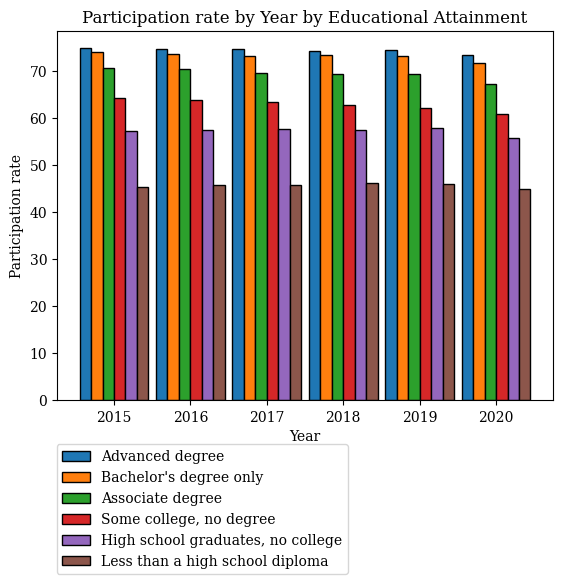

In [656]:
keys = list(df.columns.levels[2])
years = [i for i in range(2015, 2021)]
keys.remove('Total')
boxes = 6
width = .15

fig, ax = plt.subplots()

ax = plt.bar(x=(np.array(years) - 5 * .075 * np.ones(6)), height=test[[keys[0] + ' ' + str(i) for i in range(2015, 2021)]].loc['Participation rate'], width=.15, label=keys[0], edgecolor='black')
ax = plt.bar(x=(np.array(years) - 3 * .075 * np.ones(6)), height=test[[keys[2] + ' ' + str(i) for i in range(2015, 2021)]].loc['Participation rate'], width=.15, label=keys[2], edgecolor='black')
ax = plt.bar(x=(np.array(years) - .075 * np.ones(6)), height=test[[keys[1] + ' ' + str(i) for i in range(2015, 2021)]].loc['Participation rate'], width=.15, label=keys[1], edgecolor='black')
ax = plt.bar(x=(np.array(years) + .075 * np.ones(6)), height=test[[keys[5] + ' ' + str(i) for i in range(2015, 2021)]].loc['Participation rate'], width=.15, label=keys[5], edgecolor='black')
ax = plt.bar(x=(np.array(years) + 3 * .075 * np.ones(6)), height=test[[keys[3] + ' ' + str(i) for i in range(2015, 2021)]].loc['Participation rate'], width=.15, label=keys[3], edgecolor='black')
ax = plt.bar(x=(np.array(years) + 5 * .075 * np.ones(6)), height=test[[keys[4] + ' ' + str(i) for i in range(2015, 2021)]].loc['Participation rate'], width=.15, label=keys[4], edgecolor='black')

plt.legend(bbox_to_anchor=(.6,-.1))
plt.xlabel('Year')
plt.ylabel('Participation rate')
plt.title('Participation rate by Year by Educational Attainment')



In [ ]:
px.bar(        )

Text(0.5, 1.0, 'Employment-population ratio by Year by Educational Attainment')

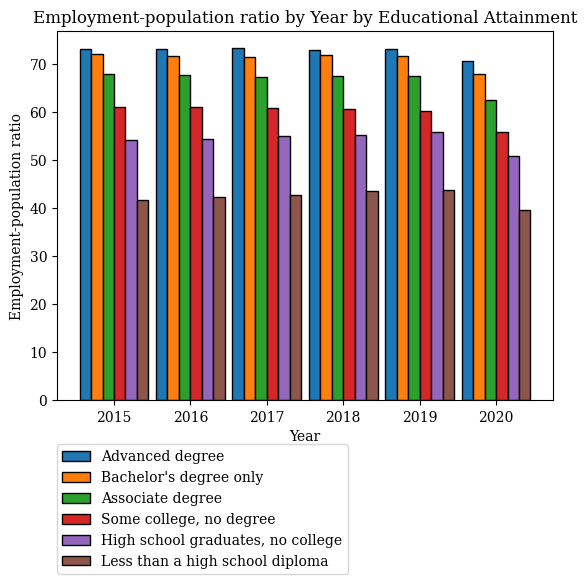

In [387]:

keys = list(df.columns.levels[2])
years = [i for i in range(2015, 2021)]
keys.remove('Total')
boxes = 6
width = .15

plt.set_cmap('Blues')

plt.bar(x=(np.array(years) - 5 * .075 * np.ones(6)), height=test[[keys[0] + ' ' + str(i) for i in range(2015, 2021)]].loc['Employment-population ratio'], width=.15, label=keys[0], edgecolor='black')
plt.bar(x=(np.array(years) - 3 * .075 * np.ones(6)), height=test[[keys[2] + ' ' + str(i) for i in range(2015, 2021)]].loc['Employment-population ratio'], width=.15, label=keys[2], edgecolor='black')
plt.bar(x=(np.array(years) - .075 * np.ones(6)), height=test[[keys[1] + ' ' + str(i) for i in range(2015, 2021)]].loc['Employment-population ratio'], width=.15, label=keys[1], edgecolor='black')
plt.bar(x=(np.array(years) + .075 * np.ones(6)), height=test[[keys[5] + ' ' + str(i) for i in range(2015, 2021)]].loc['Employment-population ratio'], width=.15, label=keys[5], edgecolor='black')
plt.bar(x=(np.array(years) + 3 * .075 * np.ones(6)), height=test[[keys[3] + ' ' + str(i) for i in range(2015, 2021)]].loc['Employment-population ratio'], width=.15, label=keys[3], edgecolor='black')
plt.bar(x=(np.array(years) + 5 * .075 * np.ones(6)), height=test[[keys[4] + ' ' + str(i) for i in range(2015, 2021)]].loc['Employment-population ratio'], width=.15, label=keys[4], edgecolor='black')

plt.legend(bbox_to_anchor=(.6,-.1))
plt.xlabel('Year')
plt.ylabel('Employment-population ratio')
plt.title('Employment-population ratio by Year by Educational Attainment')

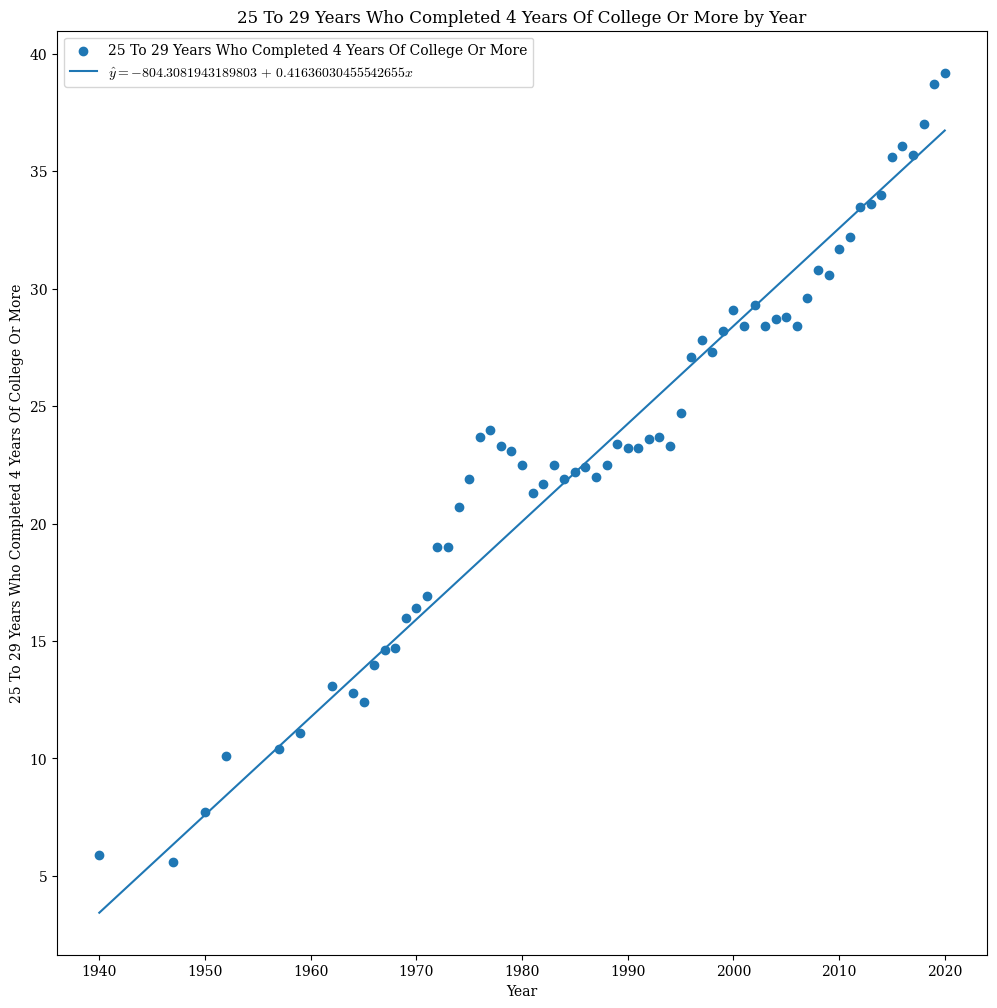

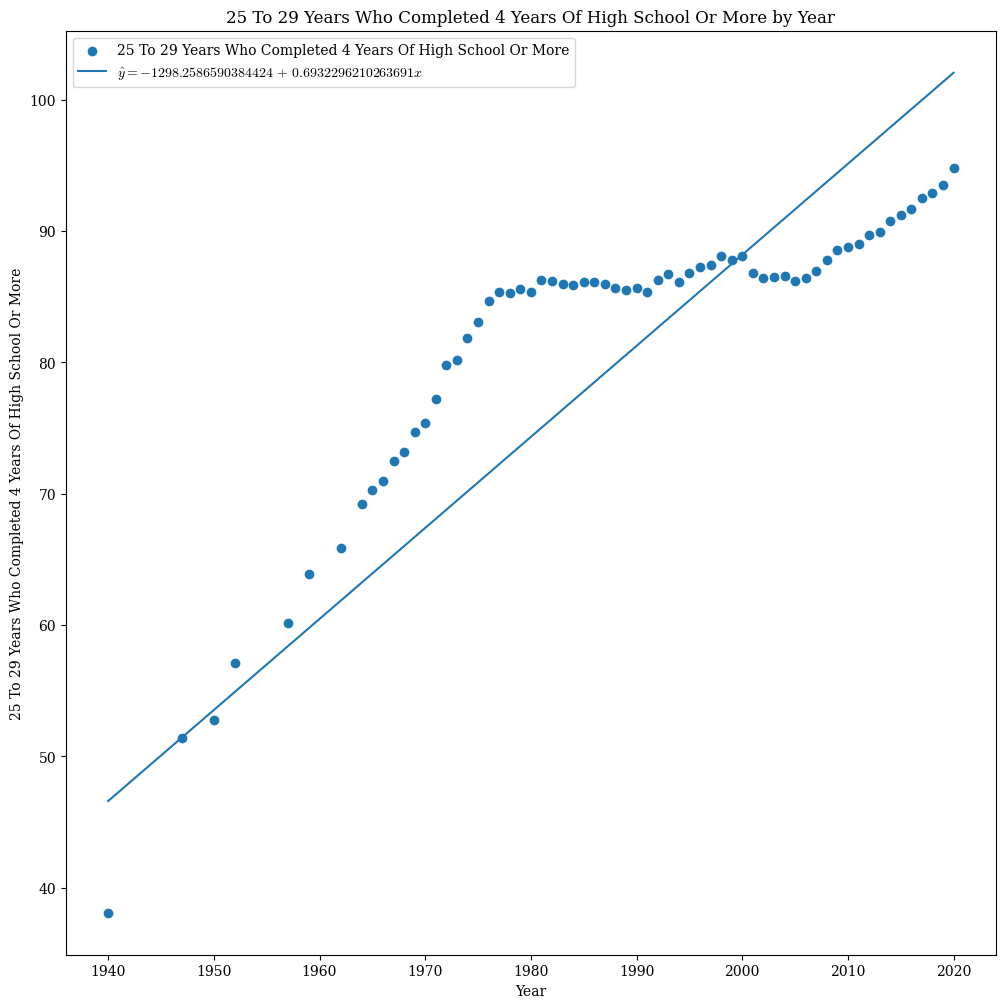

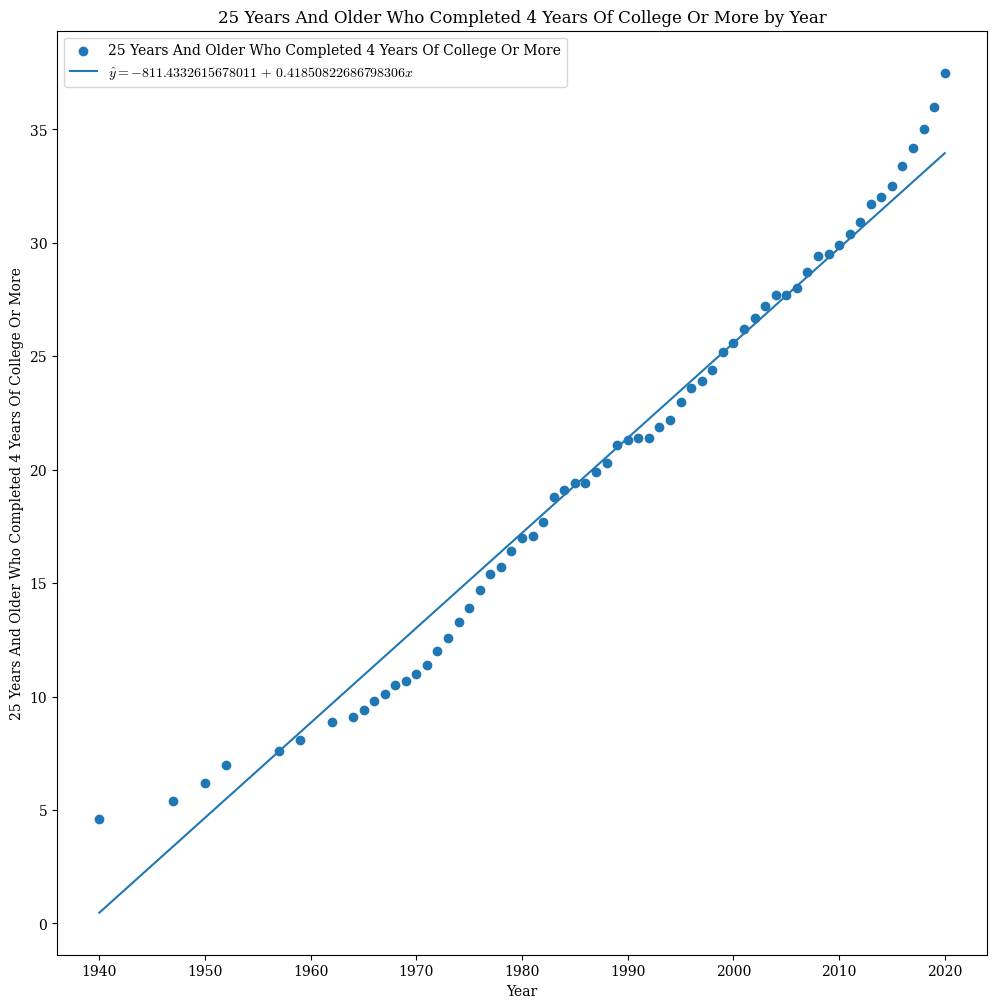

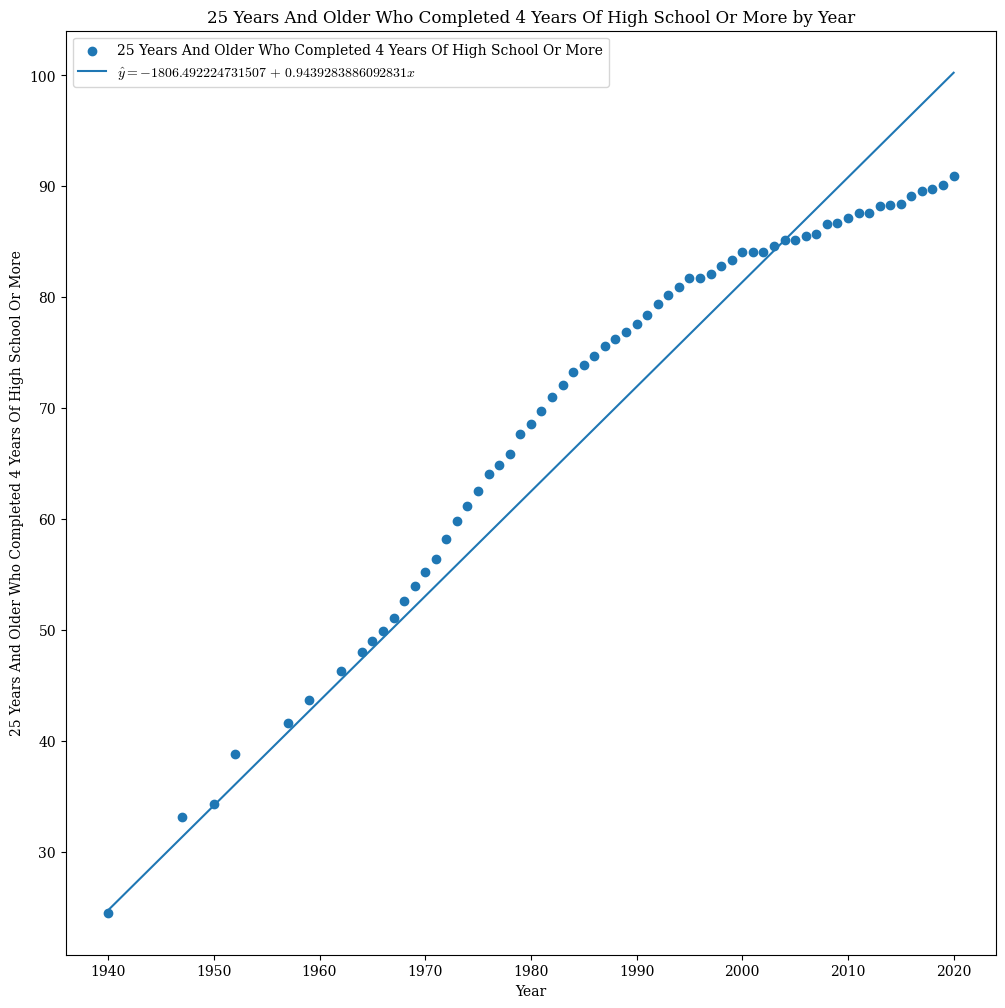

In [658]:
df = pd.read_pickle('clean-pickle/taba-2.pkl')

ages = list(df['All races']['Total'].index.levels[0])
attainment = list(df['All races']['Total'].index.levels[1])

# fig, ax = plt.subplots()

for age_group in ages:
    for edu in attainment:
        plt.figure(figsize=(12,12))
        test = df['All races']['Total'].loc[age_group].loc[edu]
        test = test.sort_index()
        string_years = list(test.index)
        years = np.array([i for i in range(int(min(string_years)), int(max(test.index)) + 1)])
        

        values = []
        for i in years:
            try:
                values.append(test.loc[str(i)])
            except:
                values.append(np.nan)
        values = np.array(values)
        assert values.shape == years.shape

        values_nonan = values.copy()
        for i in range(0, len(years)):
            try:
                if np.isnan(values[i]):
                    values_nonan[i] = test.loc['1940':str(years[i])].mean()
                else:
                    values_nonan[i] = values[i]
            except:
                pass


        lr = LinearRegression().fit(years.reshape(-1,1), values_nonan)
        t = np.linspace(min(years), max(years))
        y_hat = lr.intercept_ + lr.coef_ * t
        B0 = lr. intercept_
        B1 = lr.coef_[0]

        plt.scatter(x=years, y=values, label=(age_group + ' Who ' + edu))
        plt.plot(t, y_hat, label=(r"$\hat{y} = $" + f"${B0}$ " + r"$+$" +  f" ${B1}$" + r"$x$"))
        plt.ylabel(f'{age_group} Who {edu}')
        plt.xlabel('Year')
        plt.legend()
        plt.title(f'{age_group} Who {edu} by Year')
plt.show();

In [389]:
df = pd.read_pickle('clean-pickle/tabn102-30.pkl')
df

Median Household Income by State: Selected years 1990 through 2019  \
                                                                                   1990   
United States                                                     60000                   
Alabama                                                           47100                   
Alaska                                                            82700                   
Arizona                                                           55000                   
Arkansas                                                          42200                   
California                                                        71500                   
Colorado                                                          60200                   
Connecticut                                                       83300                   
Delaware                                                          69600                   
District of Columbia                                              61300                   
Florida                                                           54900                   
Georgia                                                           57900                   
Hawaii                                                            77500                   
Idaho                                                             50400                   
Illinois                                                          64400                   
Indiana                                                           57500                   
Iowa                                                              52400                   
Kansas                                                            54500                   
Kentucky                                                          45000                   
Louisiana                                                         43800                   
Maine                                                             55600                   
Maryland                                                          78600                   
Massachusetts                                                     73800                   
Michigan                                                          61900                   
Minnesota                                                         61700                   
Mississippi                                                       40200                   
Missouri                                                          52600                   
Montana                                                           45900                   
Nebraska                                                          51900                   
Nevada                                                            61900                   
New Hampshire                                                     72500                   
New Jersey                                                        81700                   
New Mexico                                                        48100                   
New York                                                          65800                   
North Carolina                                                    53200                   
North Dakota                                                      46300                   
Ohio                                                              57300                   
Oklahoma                                                          47100                   
Oregon                                                            54400                   
Pennsylvania                                                      58000                   
Rhode Island                                                      64200                   
South Carolina                                                    52400                   
South Dakota     

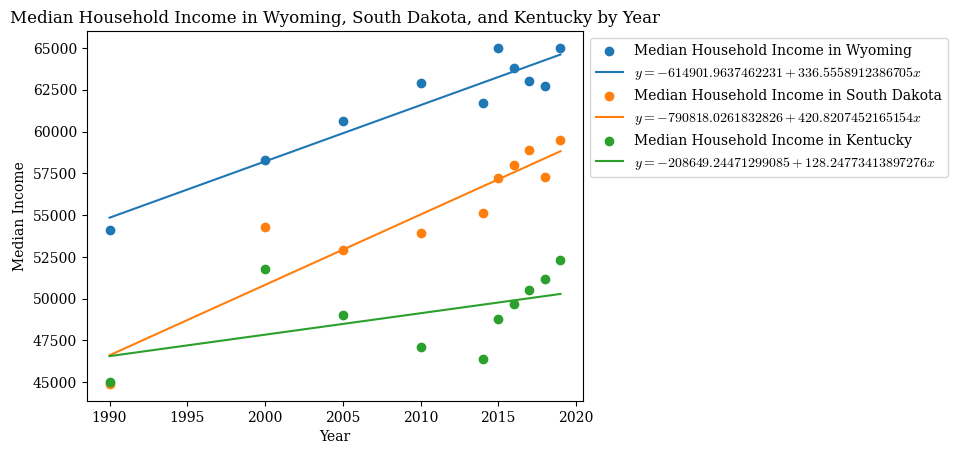

In [390]:
X, Y, Z = random.randint(0, len(df.index) - 1), random.randint(0, len(df.index) - 1), random.randint(0, len(df.index) - 1)
index = list(df.index)
states = []
states.append(index[X]), states.append(index[Y]), states.append(index[Z])

for state in states:
    data = df.loc[state].droplevel(0, axis=0).values
    years = np.array(list(df.droplevel(0, axis=1).columns))

    lr = LinearRegression().fit(years.reshape(-1, 1), data)
    t = np.linspace(1990, 2019)
    B0 = lr.intercept_
    B1 = lr.coef_[0]
    y_hat = B0 + B1 * t

    plt.scatter(years, data, label=f"Median Household Income in {state}")
    plt.plot(t, y_hat, label=(r"$y= $" + f"${B0} + {B1}x$"))
    plt.xlabel("Year")
    plt.ylabel("Median Income")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(f"Median Household Income in {index[X].strip()}, {index[Y].strip()}, and {index[Z].strip()} by Year")
plt.show()

In [431]:
df = pd.read_pickle('clean-pickle/cpsaat-all-years.pkl')
cpsaat = pd.DataFrame()
for i in range(2015, 2021):
    year = str(i)
    dummy = df.transpose()['TOTAL'].droplevel(1)
    indicies = list(dummy.index.levels[1])
    indicies.remove('Total')
    keys = list(dummy.columns)
    values = [f"{key} {year}" for key in keys]
    columns = {k:v for (k,v) in zip(keys, values)}
    dummy = dummy.loc[year].loc[indicies].rename(columns=columns)
    cpsaat = pd.concat([cpsaat, dummy], axis=1)
cpsaat

,Civilian noninstitutional population 2015,Civilian labor force 2015,Participation rate 2015,Employed 2015,Employment-population ratio 2015,Unemployed 2015,Unemployment rate 2015,Civilian noninstitutional population 2016,Civilian labor force 2016,Participation rate 2016,...,Employment-population ratio 2019,Unemployed 2019,Unemployment rate 2019,Civilian noninstitutional population 2020,Civilian labor force 2020,Participation rate 2020,Employed 2020,Employment-population ratio 2020,Unemployed 2020,Unemployment rate 2020
Advanced degree,25975.0,19449.0,74.9,19020.0,73.2,429.0,2.2,27201.0,20339.0,74.8,...,73.2,412.0,1.9,31510.0,23123.0,73.4,22252.0,70.6,871.0,3.8
Associate degree,20937.0,14774.0,70.6,14213.0,67.9,562.0,3.8,21696.0,15267.0,70.4,...,67.5,429.0,2.7,23251.0,15636.0,67.2,14532.0,62.5,1103.0,7.1
Bachelor's degree only,44086.0,32684.0,74.1,31772.0,72.1,912.0,2.8,45327.0,33384.0,73.7,...,71.6,822.0,2.2,51985.0,37340.0,71.8,35286.0,67.9,2054.0,5.5
"High school graduates, no college",61712.0,35322.0,57.2,33402.0,54.1,1920.0,5.4,62022.0,35649.0,57.5,...,55.8,1324.0,3.7,62121.0,34741.0,55.9,31606.0,50.9,3135.0,9.0
Less than a high school diploma,24175.0,10971.0,45.4,10098.0,41.8,873.0,8.0,23368.0,10679.0,45.7,...,43.7,535.0,5.4,19900.0,8930.0,44.9,7888.0,39.6,1041.0,11.7
"Some college, no degree",35326.0,22706.0,64.3,21573.0,61.1,1134.0,5.0,35489.0,22667.0,63.9,...,60.2,709.0,3.3,34076.0,20766.0,60.9,19037.0,55.9,1728.0,8.3


In [474]:
from sklearn.model_selection import train_test_split
test = cpsaat.transpose()

test

,Advanced degree,Associate degree,Bachelor's degree only,"High school graduates, no college",Less than a high school diploma,"Some college, no degree"
Civilian noninstitutional population 2015,25975.0,20937.0,44086.0,61712.0,24175.0,35326.0
Civilian labor force 2015,19449.0,14774.0,32684.0,35322.0,10971.0,22706.0
Participation rate 2015,74.9,70.6,74.1,57.2,45.4,64.3
Employed 2015,19020.0,14213.0,31772.0,33402.0,10098.0,21573.0
Employment-population ratio 2015,73.2,67.9,72.1,54.1,41.8,61.1
Unemployed 2015,429.0,562.0,912.0,1920.0,873.0,1134.0
Unemployment rate 2015,2.2,3.8,2.8,5.4,8.0,5.0
Civilian noninstitutional population 2016,27201.0,21696.0,45327.0,62022.0,23368.0,35489.0
Civilian labor force 2016,20339.0,15267.0,33384.0,35649.0,10679.0,22667.0
Participation rate 2016,74.8,70.4,73.7,57.5,45.7,63.9


In [488]:
indicies = [f"Unemployed {i}" for i in range(2015, 2021)]
Y = test.loc[indicies] # Target
X = test.loc[[f"Employed {i}" for i in range(2015, 2021)]] # Feature
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)

In [489]:
lr = LinearRegression().fit(X_train, Y_train)
B0 = lr.intercept_
B1 = lr.coef_
Y_hat = B0 + np.matmul(B1, X)
Y_hat

,Advanced degree,Associate degree,Bachelor's degree only,"High school graduates, no college",Less than a high school diploma,"Some college, no degree"
0,648.925020,3717.182614,7406.634966,5978.715161,7789.343284,7590.606645
1,-2531.236435,1490.285330,2241.597235,990.754389,6451.585214,4547.890752
2,-4676.632015,24.901944,-1208.189771,-2239.037650,5620.030861,2612.556630
3,-571.922158,2724.109898,5280.525448,3572.700695,7048.599833,6050.113718
4,-6482.607646,-1308.497352,-4198.489930,-5331.400653,4707.518701,629.931011
5,-5309.972997,-549.128947,-2339.568939,-3731.634541,5047.533010,1495.181889


In [490]:
lr.score(X_test, Y_test)

-0.8874292041307497

In [504]:
df = pd.read_pickle('clean-pickle/cpsaat-all-years.pkl')
test = pd.DataFrame()
for i in range(2015, 2021):
    year = str(i)
    dummy = df[year].droplevel(0, axis=1).drop(columns='Total', axis=1)
    dummy['Year'] = [year for i in range(0, len(dummy))]
    test = pd.concat([test, dummy])
test

Less than a high school diploma  \
TOTAL                        Civilian noninstitutional population                          24175.0   
                             Civilian labor force                                          10971.0   
                             Participation rate                                               45.4   
                             Employed                                                      10098.0   
                             Employment-population ratio                                      41.8   
...                                                                                            ...   
Hispanic or Latino ethnicity Participation rate                                               57.0   
                             Employed                                                       4535.0   
                             Employment-population ratio                                      50.6   
                             Unemployed                                                      572.0   
                             Unemployment rate                                                11.2   

                                                                   High school graduates, no college  \
TOTAL                        Civilian noninstitutional population                            61712.0   
                             Civilian labor force                                            35322.0   
                             Participation rate                                                 57.2   
                             Employed                                                        33402.0   
                             Employment-population ratio                                        54.1   
...                                                                                              ...   
Hispanic or Latino ethnicity Participation rate                                                 67.9   
                             Employed                                                         6724.0   
                             Employment-population ratio                                        61.0   
                             Unemployed                                                        753.0   
                             Unemployment rate                                                  10.1   

                                                                   Some college, no degree  \
TOTAL                        Civilian noninstitutional population                  35326.0   
                             Civilian labor force                                  22706.0   
                             Participation rate                                       64.3   
                             Employed                                              21573.0   
                             Employment-population ratio                              61.1   
...                                                                                    ...   
Hispanic or Latino ethnicity Participation rate                                       72.2   
                             Employed                                               3231.0   
                             Employment-population ratio                              65.7   
                             Unemployed                                              321.0   
                             Unemployment rate                                         9.0   

                                                                   Associate degree  \
TOTAL                        Civilian noninstitutional population           20937.0   
                             Civilian labor force                           14774.0   
                             Participation rate                                70.6   
                             Employed                                       14213.0   
                             

In [593]:
df = pd.read_pickle('clean-pickle/cpsaat-all-years.pkl')
df = df.transpose()
cpsaat = pd.DataFrame()
for i in range(2015, 2021):
    year = str(i)
    test = df.loc[year].droplevel(0)['TOTAL']
    test = test.drop('Total', axis=0)
    test['Year'] = [int(year) for i in range(0, len(test))]
    test['Attainment'] = list(test.index)
    dummies = pd.get_dummies(test['Attainment'])
    test = pd.concat([test, dummies], axis=1)
    test = test.drop(columns = 'Attainment', axis=1)
    cpsaat = pd.concat([cpsaat, test])
cpsaat.head()





,Civilian noninstitutional population,Civilian labor force,Participation rate,Employed,Employment-population ratio,Unemployed,Unemployment rate,Year,Advanced degree,Associate degree,Bachelor's degree only,"High school graduates, no college",Less than a high school diploma,"Some college, no degree"
Less than a high school diploma,24175.0,10971.0,45.4,10098.0,41.8,873.0,8.0,2015,0,0,0,0,1,0
"High school graduates, no college",61712.0,35322.0,57.2,33402.0,54.1,1920.0,5.4,2015,0,0,0,1,0,0
"Some college, no degree",35326.0,22706.0,64.3,21573.0,61.1,1134.0,5.0,2015,0,0,0,0,0,1
Associate degree,20937.0,14774.0,70.6,14213.0,67.9,562.0,3.8,2015,0,1,0,0,0,0
Bachelor's degree only,44086.0,32684.0,74.1,31772.0,72.1,912.0,2.8,2015,0,0,1,0,0,0


In [620]:
X = cpsaat[['Employed', 'Participation rate']]
Y = cpsaat[['Unemployed','Unemployment rate', 'Year']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)
lr = LinearRegression().fit(X_train, Y_train)
lr.score(X_test, Y_test)


0.09772817374118777

In [621]:
X_train.shape, lr.coef_.shape , lr.intercept_.shape, Y_train.shape

((27, 2), (3, 2), (3,), (27, 3))

In [622]:
Y_hat = np.matmul(X_train, lr.coef_.transpose()) + lr.intercept_

In [624]:
Y_hat.rename(columns={0:'Unemployed (Prediction)', 1:'Unemployment rate (Prediction)', 2 :'Year (Prediction)'}, inplace=True)

In [625]:
pd.concat([Y_hat, Y_train], axis=1, ignore_index=False).loc['Less than a high school diploma'].drop(columns='Year (Prediction)')

,Unemployed (Prediction),Unemployment rate (Prediction),Unemployed,Unemployment rate,Year
Less than a high school diploma,888.932918,7.750543,576.0,5.6,2018
Less than a high school diploma,908.831203,7.826566,795.0,7.4,2016
Less than a high school diploma,855.632117,8.033017,1041.0,11.7,2020
Less than a high school diploma,924.641542,7.868318,873.0,8.0,2015
